DS11 python で iris データのサポートベクターマシンを作成

In [ ]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [44]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import svm, metrics

<Figure size 1080x468 with 0 Axes>

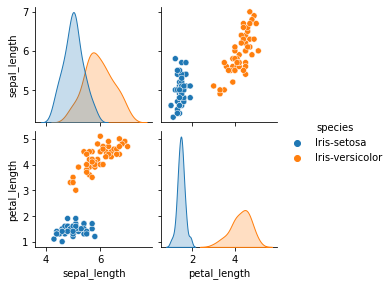

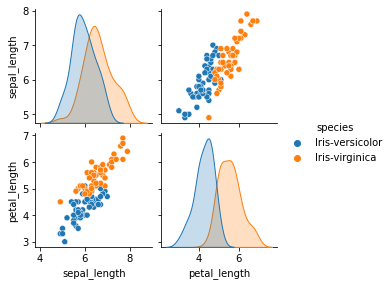

In [45]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal_length', 'petal_length', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal_length', 'petal_length']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal_length', 'petal_length']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [33]:
# setosa x versicolor について、線形SVMとカーネルSVM(ガウシアンカーネル)を作成して識別精度を確認
clf_1 = svm.SVC(kernel="linear")
clf_1 = clf_1.fit(iris_data_1, iris_target_1)
predict = clf_1.predict(iris_data_1)
print('linear SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('linear SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

clf_2 = svm.SVC(kernel="rbf", gamma=5, C=1)
clf_2 = clf_2.fit(iris_data_1, iris_target_1)
predict = clf_2.predict(iris_data_1)
print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_1, predict))
print('RBF SVM : f1_score', metrics.f1_score(iris_target_1, predict, average="micro"))

# 散布図表示のコードは notebook で配布

linear SVM : accuracy_score 1.0
linear SVM : f1_score 1.0
RBF SVM : accuracy_score 1.0
RBF SVM : f1_score 1.0


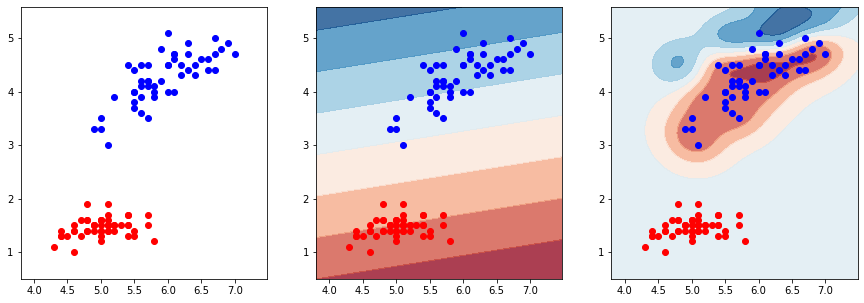

In [50]:
# 散布図表示のコード
x_min, x_max = iris_data_1['sepal_length'].min() - 0.5, iris_data_1['sepal_length'].max() + 0.5
y_min, y_max = iris_data_1['petal_length'].min() - 0.5, iris_data_1['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal_length', 'petal_length'])

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal_length'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 2)
Z = clf_1.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal_length'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 3)
Z = clf_2.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal_length'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

In [41]:
# versicolor x virginica について、線形SVMとカーネルSVM(ガウシアンカーネル)を作成して識別精度を確認
clf_1 = svm.SVC(kernel="linear")
clf_1 = clf_1.fit(iris_data_2, iris_target_2)
predict = clf_1.predict(iris_data_2)
print('linear SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('linear SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

clf_2 = svm.SVC(kernel="rbf", gamma=5, C=1)
clf_2 = clf_2.fit(iris_data_2, iris_target_2)
predict = clf_2.predict(iris_data_2)
print('RBF SVM : accuracy_score', metrics.accuracy_score(iris_target_2, predict))
print('RBF SVM : f1_score', metrics.f1_score(iris_target_2, predict, average="micro"))

# 散布図表示のコードは notebook で配布

linear SVM : accuracy_score 0.93
linear SVM : f1_score 0.93
RBF SVM : accuracy_score 0.96
RBF SVM : f1_score 0.96


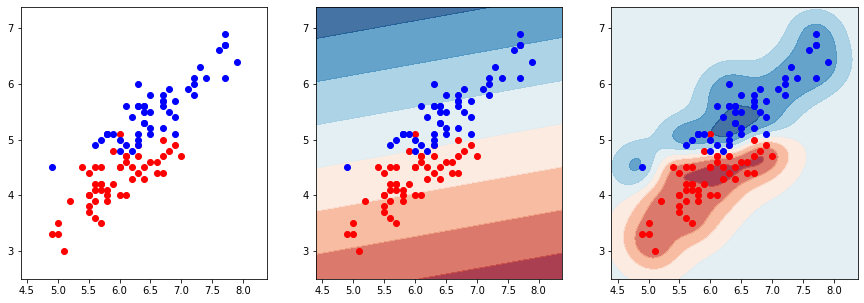

In [51]:
# 散布図表示のコード
x_min, x_max = iris_data_2['sepal_length'].min() - 0.5, iris_data_2['sepal_length'].max() + 0.5
y_min, y_max = iris_data_2['petal_length'].min() - 0.5, iris_data_2['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal_length', 'petal_length'])

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal_length'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 2)
Z = clf_1.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal_length'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax = plt.subplot(1, 3, 3)
Z = clf_2.decision_function(mesh_df)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal_length'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal_length'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal_length'], c='blue')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()